# <span style="color:green"> Laboratorio di Simulazione Numerica (LSN) </span>

Nome: Davide Castellani  
Matricola: 967270  
email: davide.castellani1@studenti.unimi.it

## <span style="color:red">  Esercitazione 03</span>

In quest'esercitazione viene trattato il moto Browniano geometrico (GBM) applicato alla teoria di Black e Scholes riguardo all'evoluzione del prezzo di un bene.  
In particolare, secondo la teoria, per tempi $t<T$:
- Il prezzo di Call-option Europea:
$$ C\left[ S(t),t \right] = S(t) N(d_1) -K e^{-r(T-t)} N(d_2) $$
- Il prezzo di Put-option Europea:
$$ P\left[ S(t),t \right] = S(t) \left[ N(d_1)-1\right] -K e^{-r(T-t)} \left[ N(d_2)-1\right]$$

dove 
$$d_1 = \frac{1}{\sigma\sqrt{T-t}}\left[ \ln \left( \frac{S(t)}{K} \right) + \left( r+\frac{\sigma^2}{2} (T-t) \right)\right]$$

e $d_2 = d_1 - \sigma\sqrt{T-t}$, e dove
$$ N(x) = \int_{-\infty}^{x} dz \, e^{-\frac{z^2}{2}} = \frac{1}{2} \left[ 1+ {\rm erf} \left( \frac{x}{\sqrt{2}}\right) \right]$$
è la cumulativa della Gaussiana $\sim \mathcal{N}(\mu=0,\sigma^2=1)$,
con
$${\rm erf}(x) = \frac{2}{\sqrt{\pi}}\int_{0}^{x} dz \, e^{-z^2}$$

## Soluzione analitica di Black e Scholes

In [1]:
import scipy
from scipy.special import erf
import numpy
from numpy import exp
from numpy.lib.scimath import log, sqrt

# data
S0 = 100.
K = 100.
T = 1.
r = 0.1
sigma = 0.25
t=0

def N(x):
    return 0.5 * (1. + erf(x / sqrt(2.)))

def black_scholes(S0, K, T, r, sigma):
    d1 = 1./(sigma * sqrt(T)) * (log(S0 / K) + (r + (sigma**2) / 2.) * T)
    d2 = d1 - sigma * sqrt(T)
    C = S0 * N(d1) - K * exp(-r * T) * N(d2)
    P = S0 *(N(d1) - 1.) - K * exp(-r * T) * (N(d2)-1.)
    return C, P

if __name__ == "__main__":
    call, put = black_scholes(S0, K, T, r, sigma)
    print(" == BLACK-SCHOLES ==")
    print("call: ", call)
    print("put: ", put)

 == BLACK-SCHOLES ==
call:  14.975790778311286
put:  5.4595325819072364


## <span style="color:blue"> Esercizio 03.1 </span>

Fissati i valori dei parametri:
- prezzo del bene a $t=0$: $S(0)=100$
- tempo di consegna: $T=1$
- prezzo base: $K=100$
- tasso di interesse risk-free: $r=0.1$
- volatilità: $\sigma=0.25$

sono state compiute $10^6$ simulazioni Monte Carlo divise in 100 blocchi, dove i prezzi finali del bene $S(T)$ sono stati ottenuti in due modi:
1. campionando direttamente $S(T)$ per un GBM$(r,\sigma^2)$
2. discretizzando il GBM$(r,\sigma^2)$, ovvero dividendo [0,T] in 100 intervalli in cui vengono campionati $S(t_n)$ dove $t_n=\frac{T}{100}n$ con $n=0,1,2,...,100$

Per ogni stima di $S(T)$ sono stati calcolati i prezzi di _Call_ e _Put_ per le opzioni Europee e i loro valori medi per ogni blocco. Le medie globali progressive e i rispettivi errori delle quattro combinazioni sono stati graficati sotto, dove è anche stato riportato il valore ottenuto analiticamente.

## Sampling diretto - Call-option

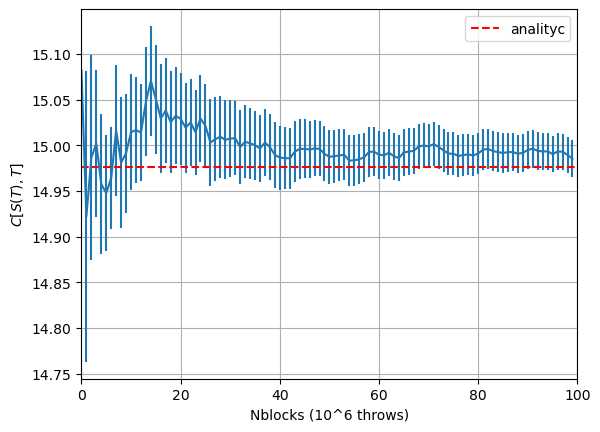

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math

x = np.arange(100)

# Carica i dati dal file
data = np.loadtxt('1.unic_call.out')

plt.errorbar(x,data[:,0],yerr=data[:,1])
plt.axhline(y=call, linestyle='--', color='r', label = 'analityc')
plt.xlabel('Nblocks (10^6 throws)')
plt.ylabel(r'$C[S(T),T]$')
plt.xlim(0, 100)
plt.grid(True)
plt.legend()
plt.show()

## Sampling diretto - Put-option

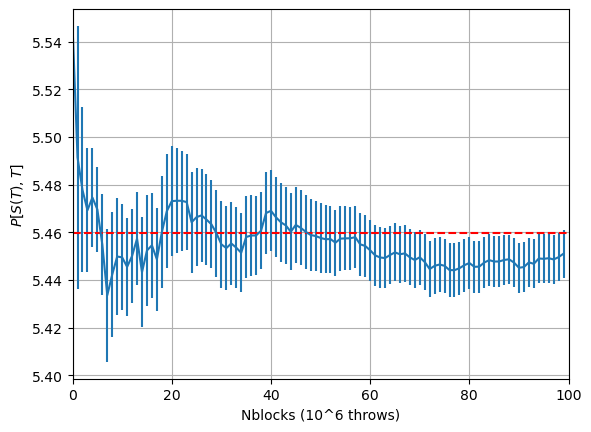

In [3]:
# Carica i dati dal file
data = np.loadtxt('1.unic_put.out')

plt.errorbar(x,data[:,0],yerr=data[:,1])
plt.axhline(y=put, linestyle='--', color='r', label = 'analityc')
plt.xlim(0, 100)
plt.xlabel('Nblocks (10^6 throws)')
plt.ylabel(r'$P[S(T),T]$')
plt.grid(True)
plt.show()

## Sampling discreto - Call-option

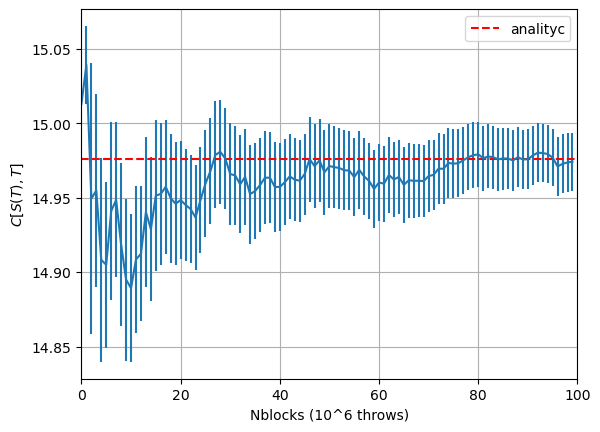

In [4]:
# Carica i dati dal file
data = np.loadtxt('1.disc_call.out')

plt.errorbar(x,data[:,0],yerr=data[:,1])
plt.axhline(y=call, linestyle='--', color='r', label = 'analityc')
plt.xlabel('Nblocks (10^6 throws)')
plt.ylabel(r'$C[S(T),T]$')
plt.xlim(0, 100)
plt.grid(True)
plt.legend()
plt.show()

## Sampling discreto - Put-option

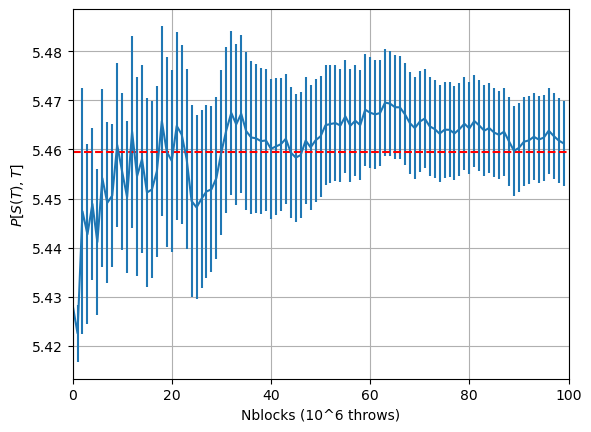

In [5]:
x = np.arange(100)

# Carica i dati dal file
data = np.loadtxt('1.disc_put.out')

plt.errorbar(x,data[:,0],yerr=data[:,1])
plt.axhline(y=put, linestyle='--', color='r', label = 'analityc')
plt.xlim(0, 100)
plt.xlabel('Nblocks (10^6 throws)')
plt.ylabel(r'$P[S(T),T]$')
plt.grid(True)
plt.show()